In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
# Read Data

file_path = "cleaned_output_full.csv"
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,File Name,Compared To,Similarity Score
0,0,AJ_Cook_0001.jpg,AJ_Cook_0001.jpg,1.000000
1,1,AJ_Cook_0001.jpg,AJ_Lamas_0001.jpg,0.000000
2,2,AJ_Cook_0001.jpg,Aaron_Eckhart_0001.jpg,0.000000
3,3,AJ_Cook_0001.jpg,Aaron_Guiel_0001.jpg,0.038307
4,4,AJ_Cook_0001.jpg,Aaron_Patterson_0001.jpg,0.000000


In [3]:
# data['Match'] = data.apply(lambda row: 1 if row['File Name'].split('_')[-1] == row['Compared To'].split('_')[-1] else 0, axis=1)
# scores = data['Similarity Score']
# labels = data['Match']
# data.head

# add Match and Label
def extract_person_identifier(file_name):
    parts =  file_name.split('_')
    if len(parts) > 1: 
        return parts[1]
    else: 
        return None


# Apply the function to create new columns for identifiers
data['File Identifier'] = data['File Name'].apply(extract_person_identifier)
data['Compared To Identifier'] = data['Compared To'].apply(extract_person_identifier)

# Create the 'Match' column based on the identifiers
data['Match'] = data.apply(lambda row: 1 if row['File Identifier'] == row['Compared To Identifier'] else 0, axis=1)

data['Label'] = data['Match'].apply(lambda x: 'Genuine' if x == 1 else 'Impostor')
scores = data['Similarity Score']
labels = data['Match']
data.head()

,Unnamed: 0,File Name,Compared To,Similarity Score,File Identifier,Compared To Identifier,Match,Label
0,0,AJ_Cook_0001.jpg,AJ_Cook_0001.jpg,1.000000,Cook,Cook,1,Genuine
1,1,AJ_Cook_0001.jpg,AJ_Lamas_0001.jpg,0.000000,Cook,Lamas,0,Impostor
2,2,AJ_Cook_0001.jpg,Aaron_Eckhart_0001.jpg,0.000000,Cook,Eckhart,0,Impostor
3,3,AJ_Cook_0001.jpg,Aaron_Guiel_0001.jpg,0.038307,Cook,Guiel,0,Impostor
4,4,AJ_Cook_0001.jpg,Aaron_Patterson_0001.jpg,0.000000,Cook,Patterson,0,Impostor


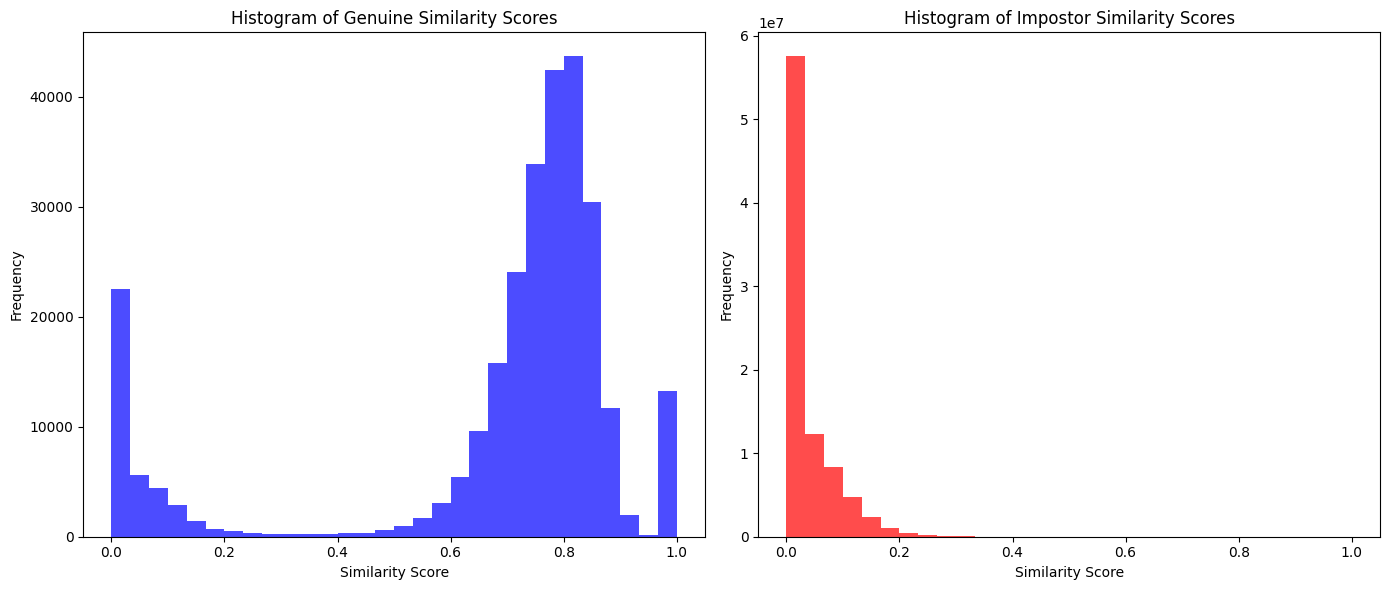

In [4]:
# Distribution Impostor and Genuine

genuine_scores = data[data['Label'] == 'Genuine']['Similarity Score']
impostor_scores = data[data['Label'] == 'Impostor']['Similarity Score']
plt.figure(figsize=(14,6))

# Plot for Genuine scores
plt.subplot(1, 2, 1)
plt.hist(genuine_scores, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Genuine Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')

# Plot for Impostor scores
plt.subplot(1, 2, 2)
plt.hist(impostor_scores, bins=30, color='red', alpha=0.7)
plt.title('Histogram of Impostor Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [5]:
distribution = data['Label'].value_counts()
print("Distribution of Genuine and Impostor cases:")
print(distribution)

# plt.figure(figsize=(8, 6))
# distribution.plot(kind='bar', color=['skyblue', 'salmon'])
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.title('Distribution of Genuine and Impostor Cases')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

Distribution of Genuine and Impostor cases:
Label
Impostor    87283900
Genuine       278861
Name: count, dtype: int64


In [6]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [7]:
tpr_list = []
fpr_list = []

for threshold in thresholds:
    tp = np.sum((scores >= threshold) & (labels == 1))
    fp = np.sum((scores >= threshold) & (labels == 0))
    fn = np.sum((scores < threshold) & (labels == 1))
    tn = np.sum((scores < threshold) & (labels == 0))
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

tpr = np.array(tpr_list)
fpr = np.array(fpr_list)

results_df = pd.DataFrame({ 
    'Threshold': thresholds, 
    'TPR': tpr_list,
    'FPR': fpr_list

})

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.4f}'.format)  # Format float to 4 decimal places

results_df




,Threshold,TPR,FPR
0,0.0000,1.0000,1.0000
1,0.0100,0.9346,0.4604
2,0.0200,0.9280,0.4077
3,0.0300,0.9213,0.3569
4,0.0400,0.9148,0.3090
5,0.0500,0.9087,0.2644
6,0.0600,0.9028,0.2237
7,0.0700,0.8973,0.1872
8,0.0800,0.8923,0.1551
9,0.0900,0.8876,0.1272


In [8]:
roc_auc = auc(fpr, tpr)

In [9]:
far = fpr
frr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((far - frr)))]
eer = far[np.nanargmin(np.absolute((far - frr)))]

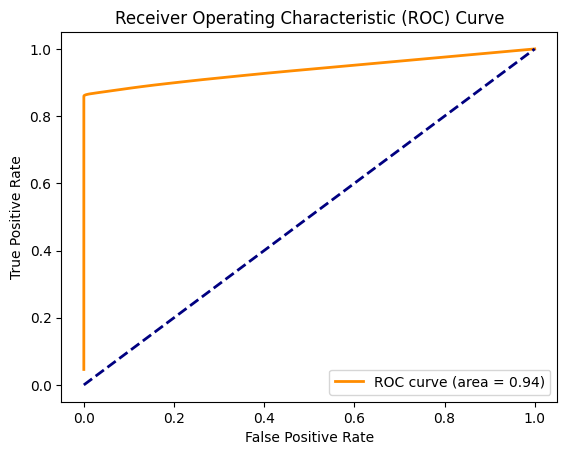

In [10]:
# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

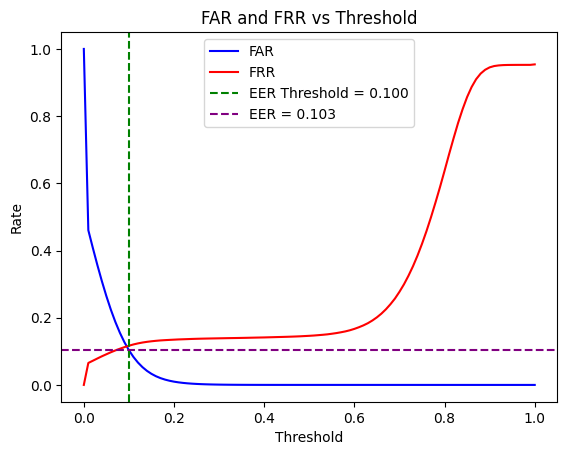

EER: 0.10335961156639425, AUC: 0.9373026526836559
Optimal Threshold: 0.29
Optimal TPR: 0.86
Optimal FPR: 0.00


In [11]:
# Plotting FAR and FRR
plt.figure()
plt.plot(thresholds, far, label='FAR', color='blue')
plt.plot(thresholds, frr, label='FRR', color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FAR and FRR vs Threshold')
plt.legend(loc='upper right')
plt.axvline(x=eer_threshold, color='green', linestyle='--', label=f'EER Threshold = {eer_threshold:.3f}')
plt.axhline(y=eer, color='purple', linestyle='--', label=f'EER = {eer:.3f}')
plt.legend()
plt.show()

print(f"EER: {eer}, AUC: {roc_auc}")

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.2f}')
print(f'Optimal TPR: {optimal_tpr:.2f}')
print(f'Optimal FPR: {optimal_fpr:.2f}')

In [12]:
frr_list = []
far_list = []

for threshold in thresholds: 
    tp = np.sum((scores >= threshold) & (labels == 1))
    fp = np.sum((scores >= threshold) & (labels == 0))
    fn = np.sum((scores < threshold) & (labels == 1))
    tn = np.sum((scores < threshold) & (labels == 0))

    frr_1 = fn / (tp + fn) if (tp+fn) > 0 else 0
    far_1 = fp / (fp + tn) if (fp+tn) > 0 else 0

    frr_list.append(frr_1)
    far_list.append(far_1)
    
results_df = pd.DataFrame({ 
    'Threshold': thresholds, 
    'FRR': frr_list,
    'FAR': far_list

})
results_df



,Threshold,FRR,FAR
0,0.0000,0.0000,1.0000
1,0.0100,0.0654,0.4604
2,0.0200,0.0720,0.4077
3,0.0300,0.0787,0.3569
4,0.0400,0.0852,0.3090
5,0.0500,0.0913,0.2644
6,0.0600,0.0972,0.2237
7,0.0700,0.1027,0.1872
8,0.0800,0.1077,0.1551
9,0.0900,0.1124,0.1272


Optimal Threshold: 0.10
Optimal FRR: 0.12
Optimal FAR: 0.10


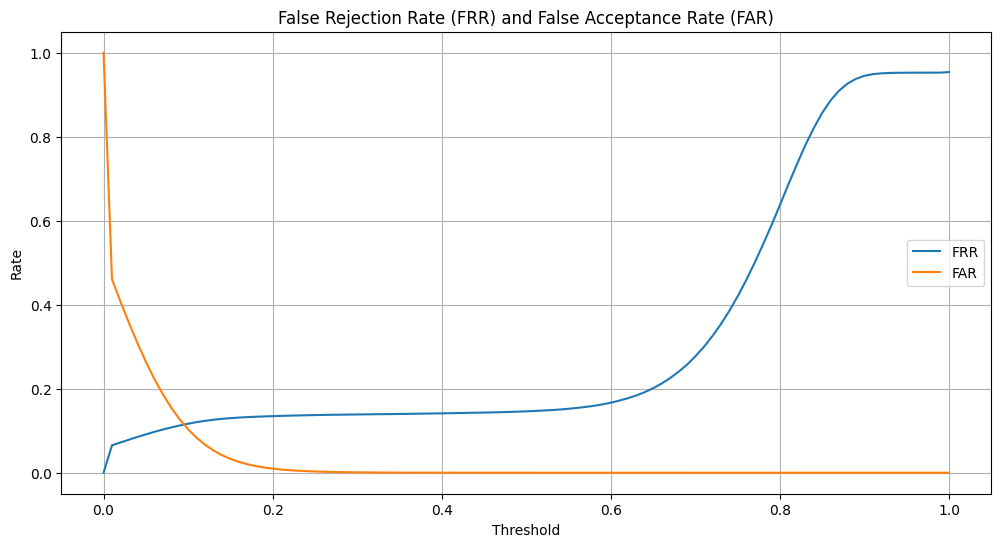

In [13]:
optimal_idx = np.argmin(np.abs(np.array(frr_list) - np.array(far_list)))
optimal_threshold = thresholds[optimal_idx]
optimal_frr = frr_list[optimal_idx]
optimal_far = far_list[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.2f}')
print(f'Optimal FRR: {optimal_frr:.2f}')
print(f'Optimal FAR: {optimal_far:.2f}')

# Plot FRR and FAR
plt.figure(figsize=(12, 6))
plt.plot(results_df['Threshold'], results_df['FRR'], label='FRR')
plt.plot(results_df['Threshold'], results_df['FAR'], label='FAR')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Rejection Rate (FRR) and False Acceptance Rate (FAR)')
plt.legend()
plt.grid(True)
plt.show()